In [1]:
import scanpy as sc
import pandas as pd
import numpy as np
from matplotlib import colors
import matplotlib.pyplot as plt 

In [2]:
# sc.logging.print_versions()
sc.settings.set_figure_params(dpi=320, facecolor='white')
sc.settings.verbosity = 3

In [3]:
# load raw count matrix of ST adata
adata = sc.read_visium("/usersdata/yiming/VIO/spaceranger_run/D1/outs", 
                       count_file="filtered_feature_bc_matrix.h5",
                       load_images="tissue_hires_image.png", 
                       source_image_path="/usersdata/yiming/VIO/spaceranger_run/D1/outs/spatial")
adata.var_names_make_unique()
adata.var["mt"] = adata.var_names.str.startswith("MT-")
sc.pp.calculate_qc_metrics(adata, qc_vars=["mt"], inplace=True)

reading /usersdata/yiming/VIO/spaceranger_run/D1/outs/filtered_feature_bc_matrix.h5
 (0:00:00)


/home/yiming/.conda/envs/velocyte/lib/python3.7/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [4]:
# load RCTD results (clean one wo top)
cellprop = pd.read_csv('/usersdata/yiming/VIO/Ranalysis/RCTD_june/slice4_norm_wei.csv', index_col=0)
# take out the coordinate from raw adata
coord = pd.DataFrame(adata.obsm['spatial'], columns=['x', 'y'], index=adata.obs_names)

# join two df by index and rm redundent cells
merge = pd.DataFrame.join(cellprop, coord)
cellprop = pd.DataFrame.drop(merge, columns=['x', 'y'])
coord = merge[['x', 'y']]

In [5]:
# specify cell type order and color
cols = ['CM', 'CMP', 'Ery', 'GMP', 'HEC&Ery', 'HPC', 'Immature PSC', 'LPM',  
        'Mk', 'MkP', 'Mono', 'NC', 'NE', 'TB-like', 'VEC', 'YSE']
cellprop = cellprop[cols]
cell_type = list(['CM', 'CMP', 'Ery', 'GMP', 'HEC&Ery', 'HPC', 'Immature PSC', 'LPM',  
        'Mk', 'MkP', 'Mono', 'NC', 'NE', 'TB-like', 'VEC', 'YSE'])
my_colors = list(['#E73986', '#F885BC', '#477AB4', '#A45B30', '#ACE093', '#E23624', '#FA9F9A', '#2E2985', 
                  '#9B4D9E', '#41AF58', '#109D7A', '#DDC23D', '#EE9B32', '#62ACE0', '#BF9BC9', '#911740'])
cmap_dict = {}
for cell, color in zip(cell_type, my_colors):
    color_list = ["#E5E5E5", color]
    cmap_dict[cell] = colors.LinearSegmentedColormap.from_list(cell, color_list)

In [6]:
# take frag1
frag1 = coord.query('(5500<x<8200) & (4500<y<6200)')
# join two df by index and rm redundent cells
df1 = pd.DataFrame.join(frag1, cellprop)
cellprop_frag1 = pd.DataFrame.drop(df1, columns=['x', 'y'])

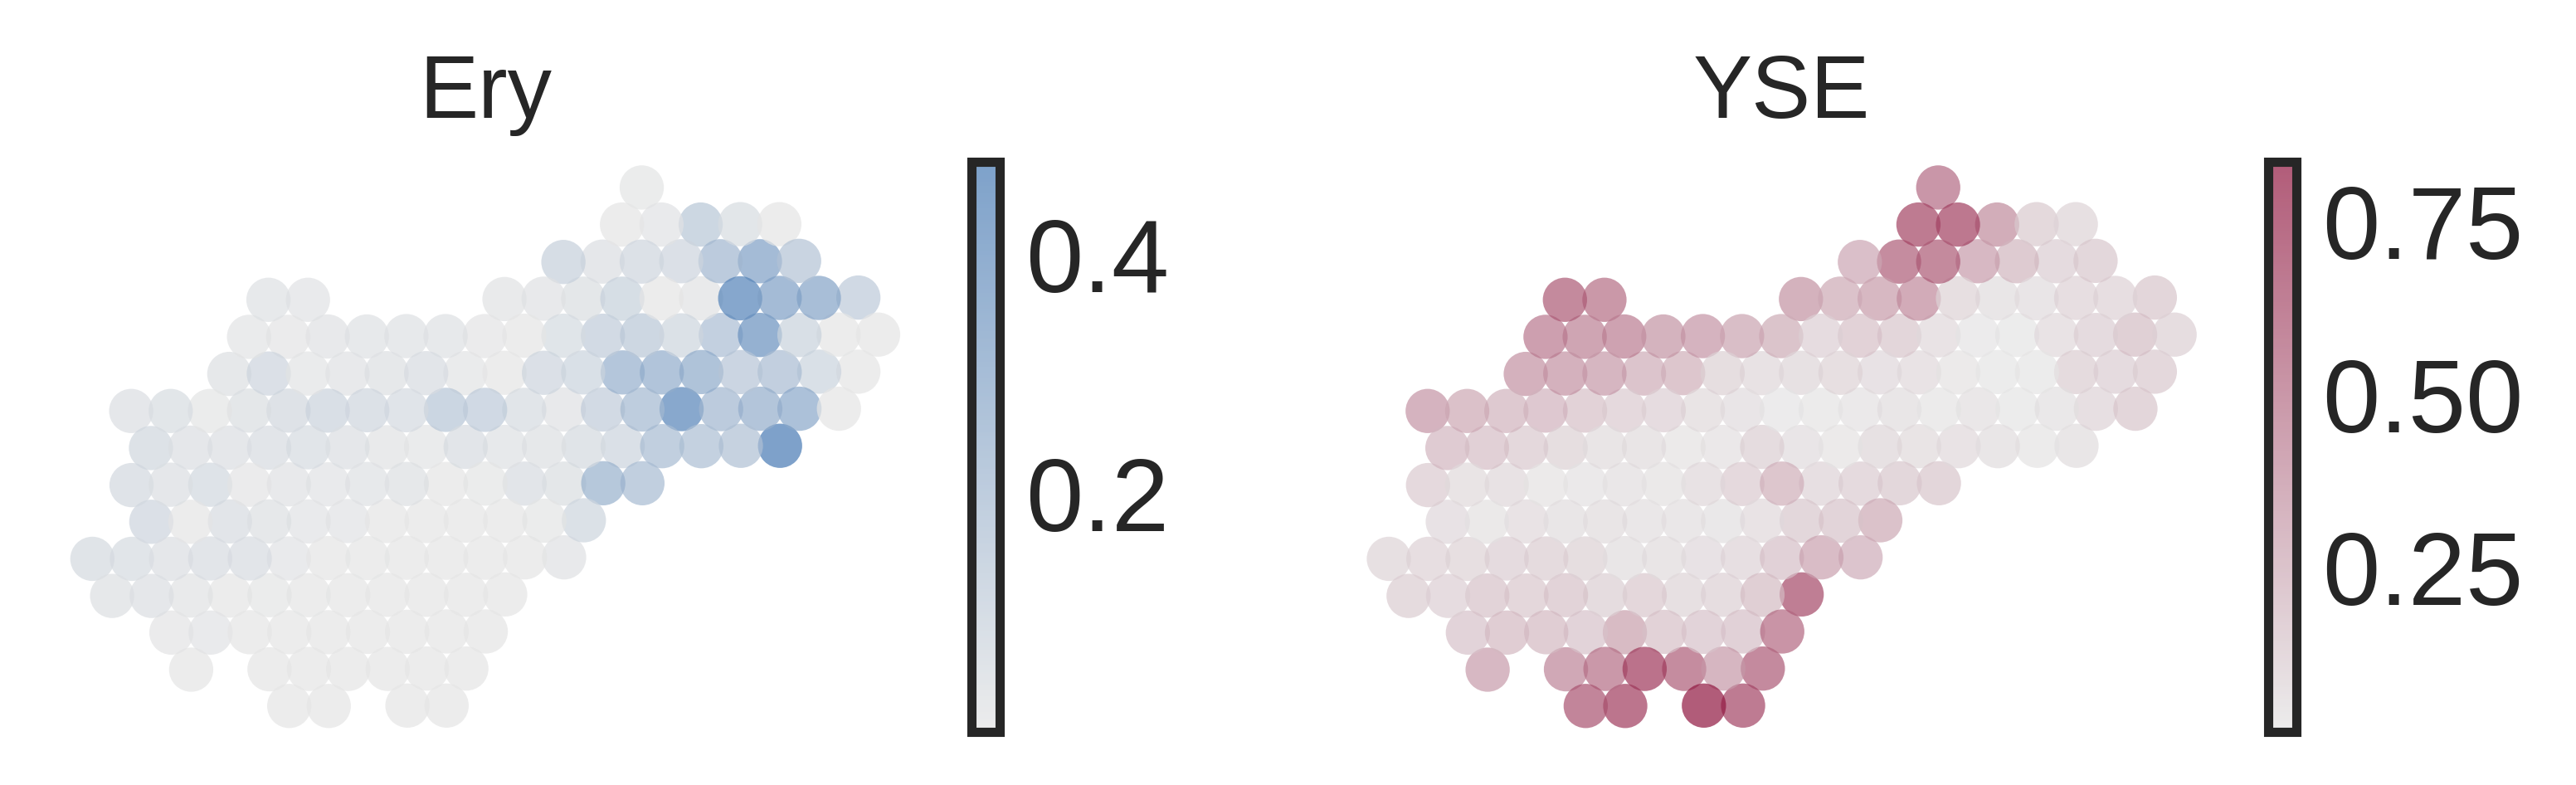

In [7]:
# frag1 TB/NC
df1 = cellprop_frag1[['Ery', 'YSE']]
# plot
plt.style.use('seaborn-white')
plt.figure(figsize=(12, 6.5))
for i,c in enumerate(df1.columns):
    plt.subplot(4, 4, i+1)
    plt.scatter(frag1.x, frag1.y*(-1), 
                marker = 'o', c=df1[c], cmap=cmap_dict[c], alpha=0.7, linewidth=0)
    plt.axis('off')
    plt.title(c, fontsize=12)
    plt.colorbar() 

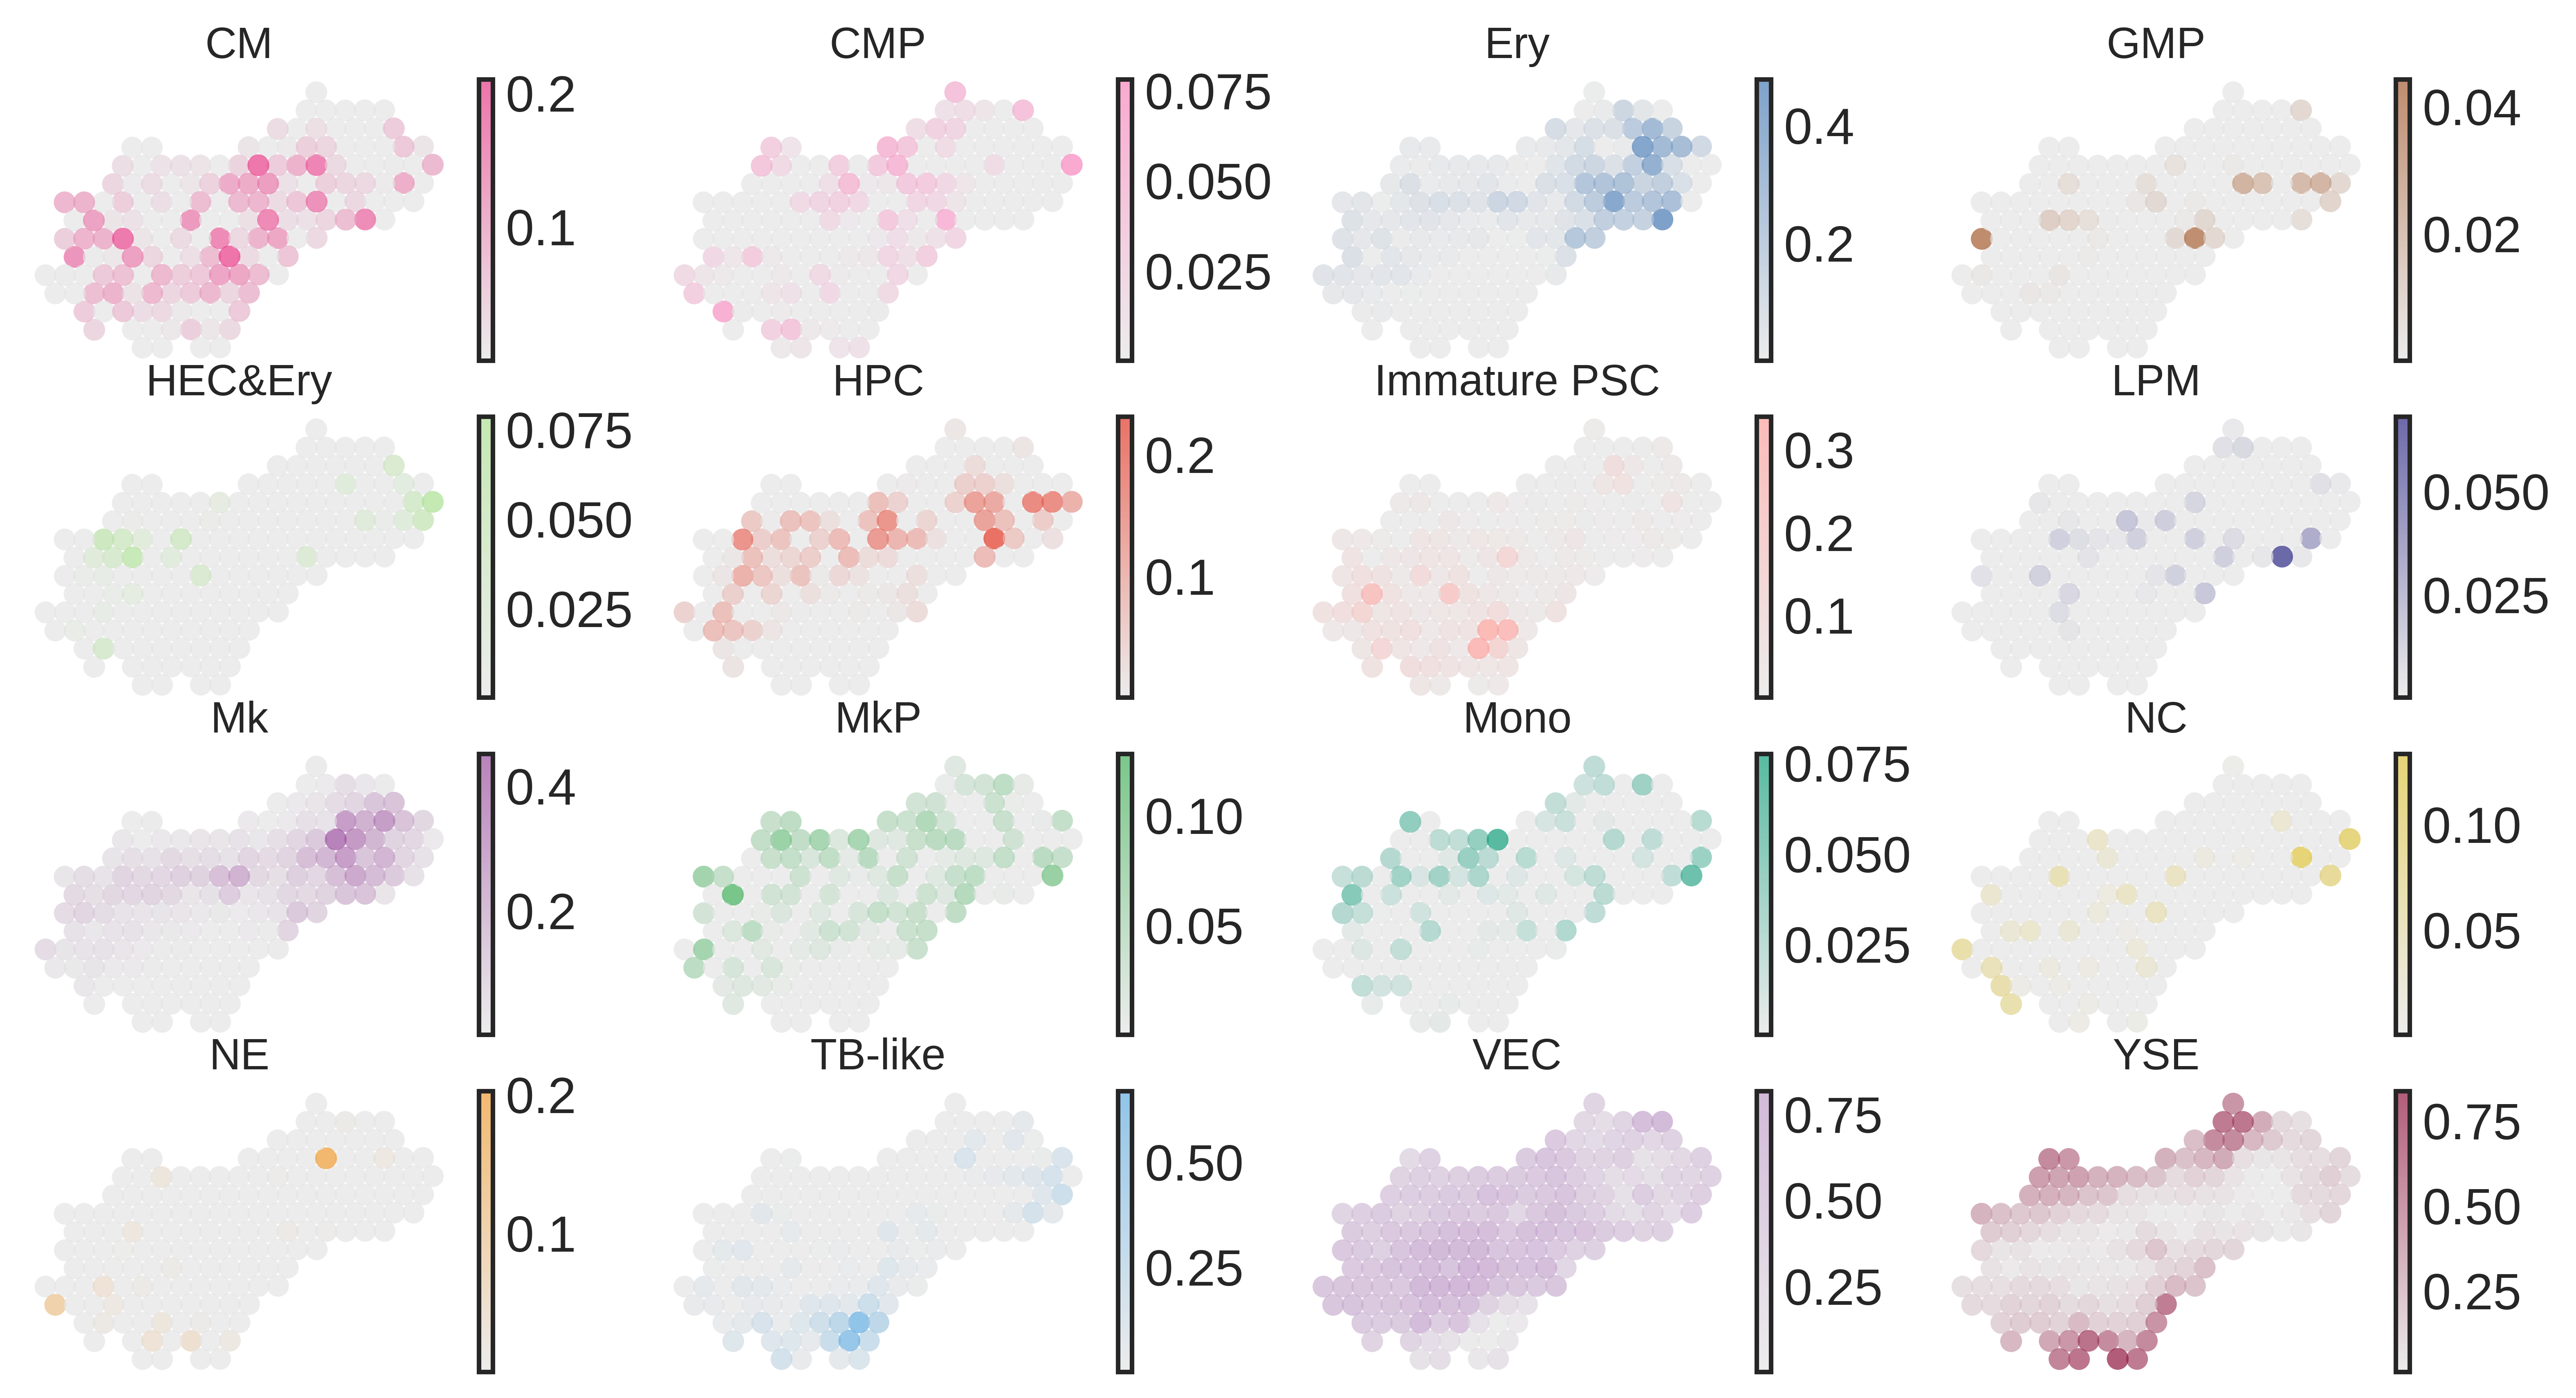

In [8]:
# frag1
plt.style.use('seaborn-white')
plt.figure(figsize=(12, 6.5))
for i,c in enumerate(cellprop_frag1.columns):
    plt.subplot(4, 4, i+1)
    plt.scatter(frag1.x, frag1.y*(-1), 
                marker = 'o', c=cellprop_frag1[c], cmap=cmap_dict[c], alpha=0.7, linewidth=0)
    plt.axis('off')
    plt.title(c, fontsize=12)
    plt.colorbar()

In [9]:
# take frag3
frag3 = coord.query('(8000<x<10700) & (2500<y<5400)')
p12 = coord.query('(8000<x<8300) & (4500<y<5400) | (9500<x<10700) & (5200<y<5400)')
frag3 = pd.DataFrame.drop(frag3, index=p12.index)
# join two df by index and rm redundent cells
df3 = pd.DataFrame.join(frag3, cellprop)
cellprop_frag3 = pd.DataFrame.drop(df3, columns=['x', 'y'])

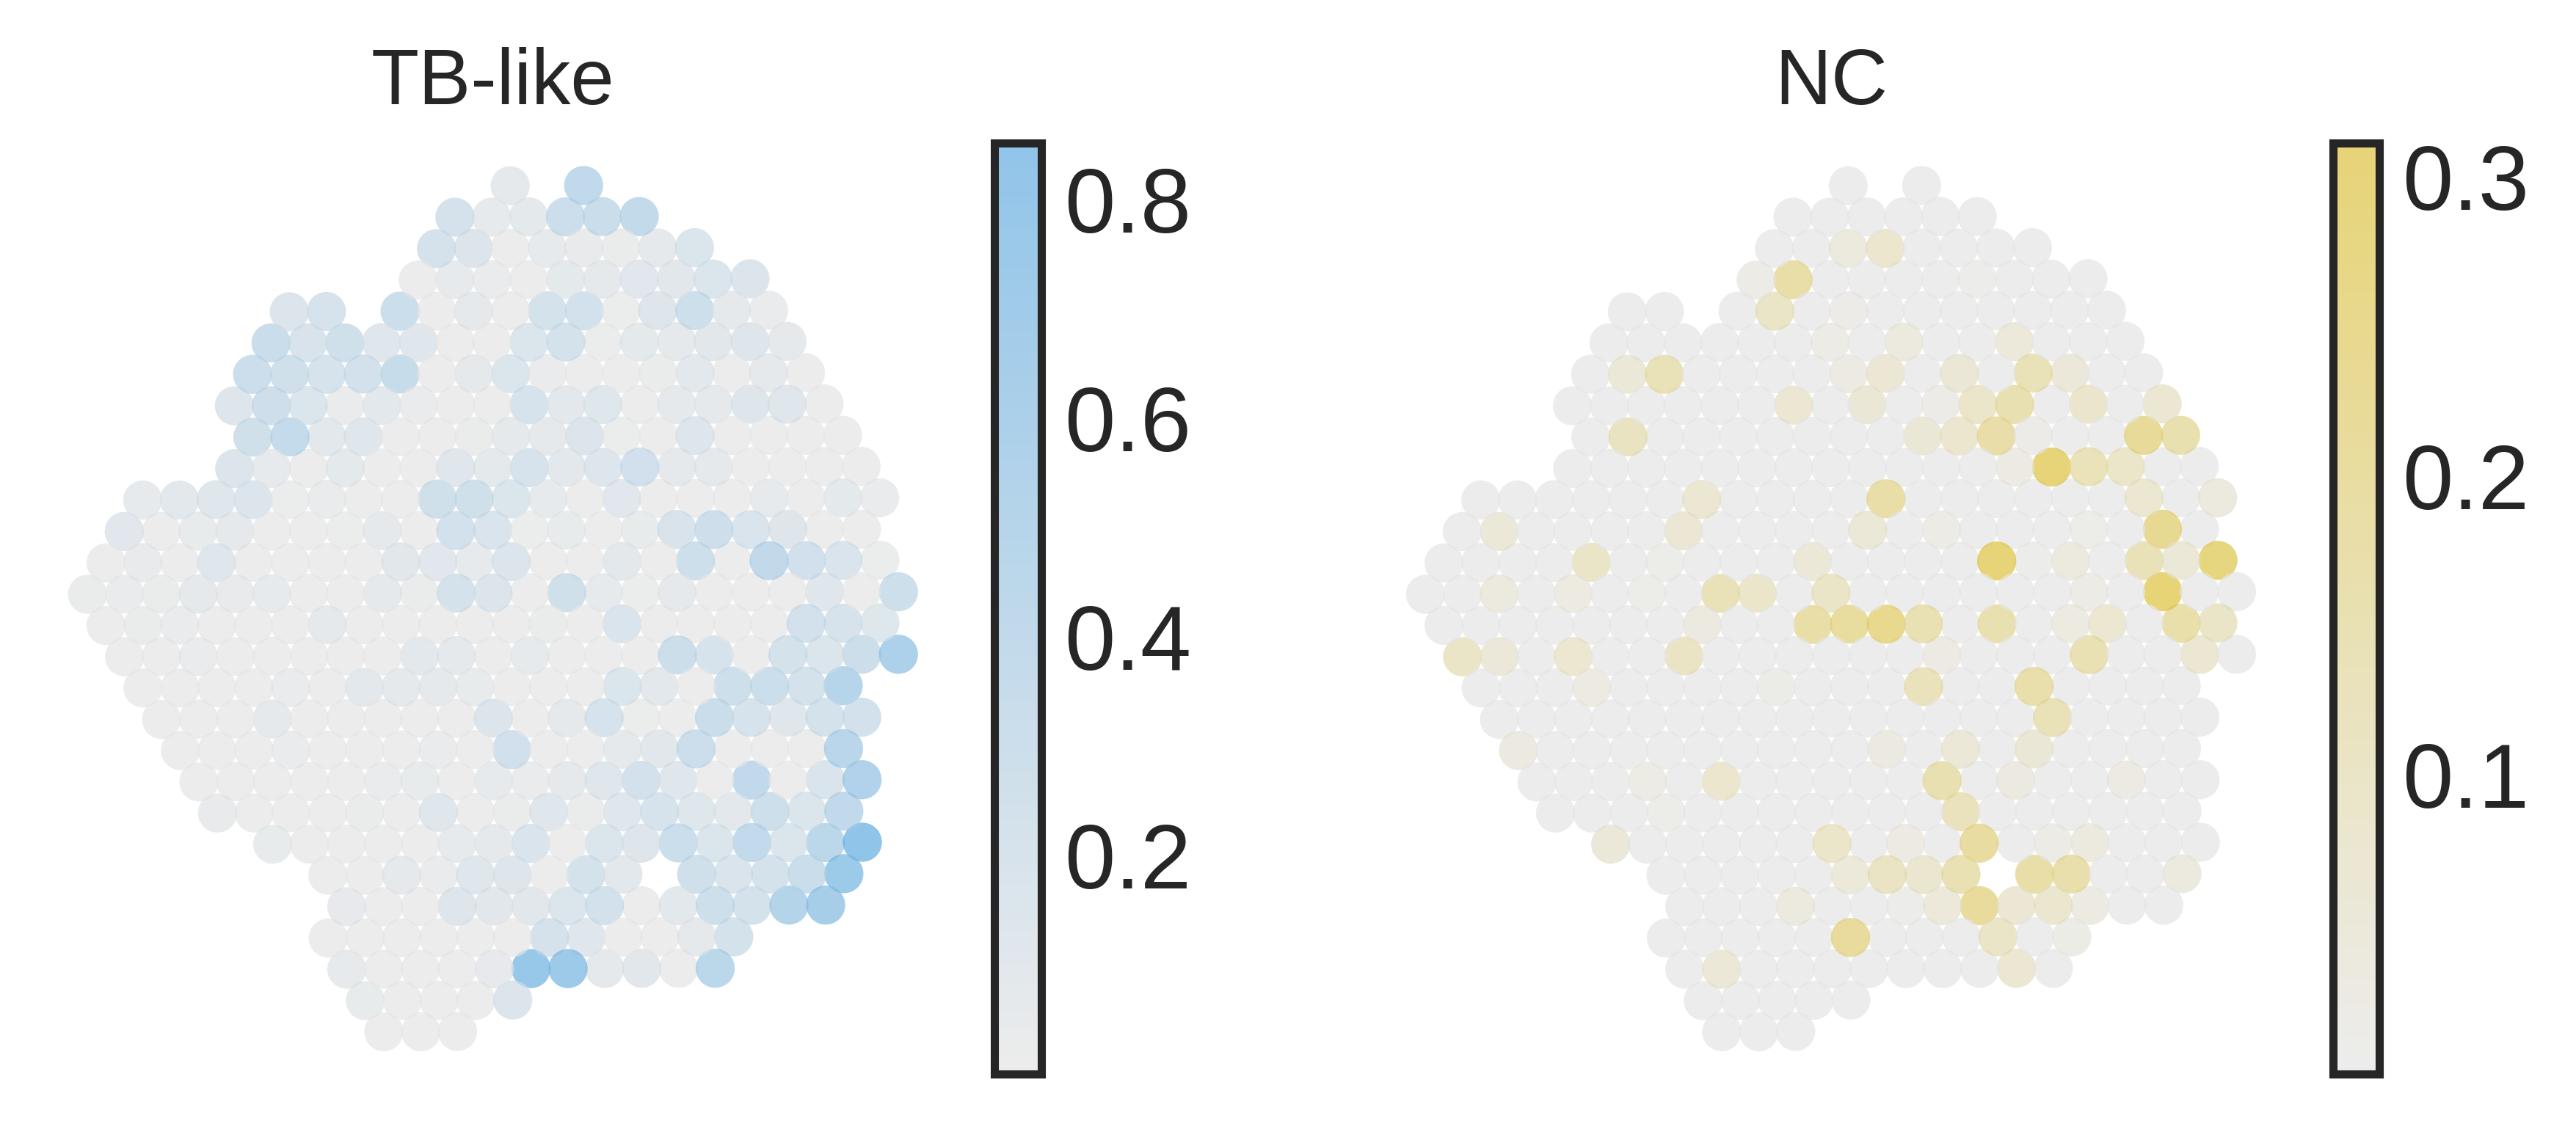

In [10]:
df3 = cellprop_frag3[['TB-like', 'NC']]
plt.style.use('seaborn-white')
plt.figure(figsize=(14, 12))
for i,c in enumerate(df3.columns):
    plt.subplot(4, 4, i+1)
    plt.scatter(frag3.x, frag3.y*(-1), 
                marker = 'o', c=df3[c], cmap=cmap_dict[c], alpha=0.7, linewidth=0)
    plt.axis('off')
    plt.title(c, fontsize=12)
    plt.colorbar()

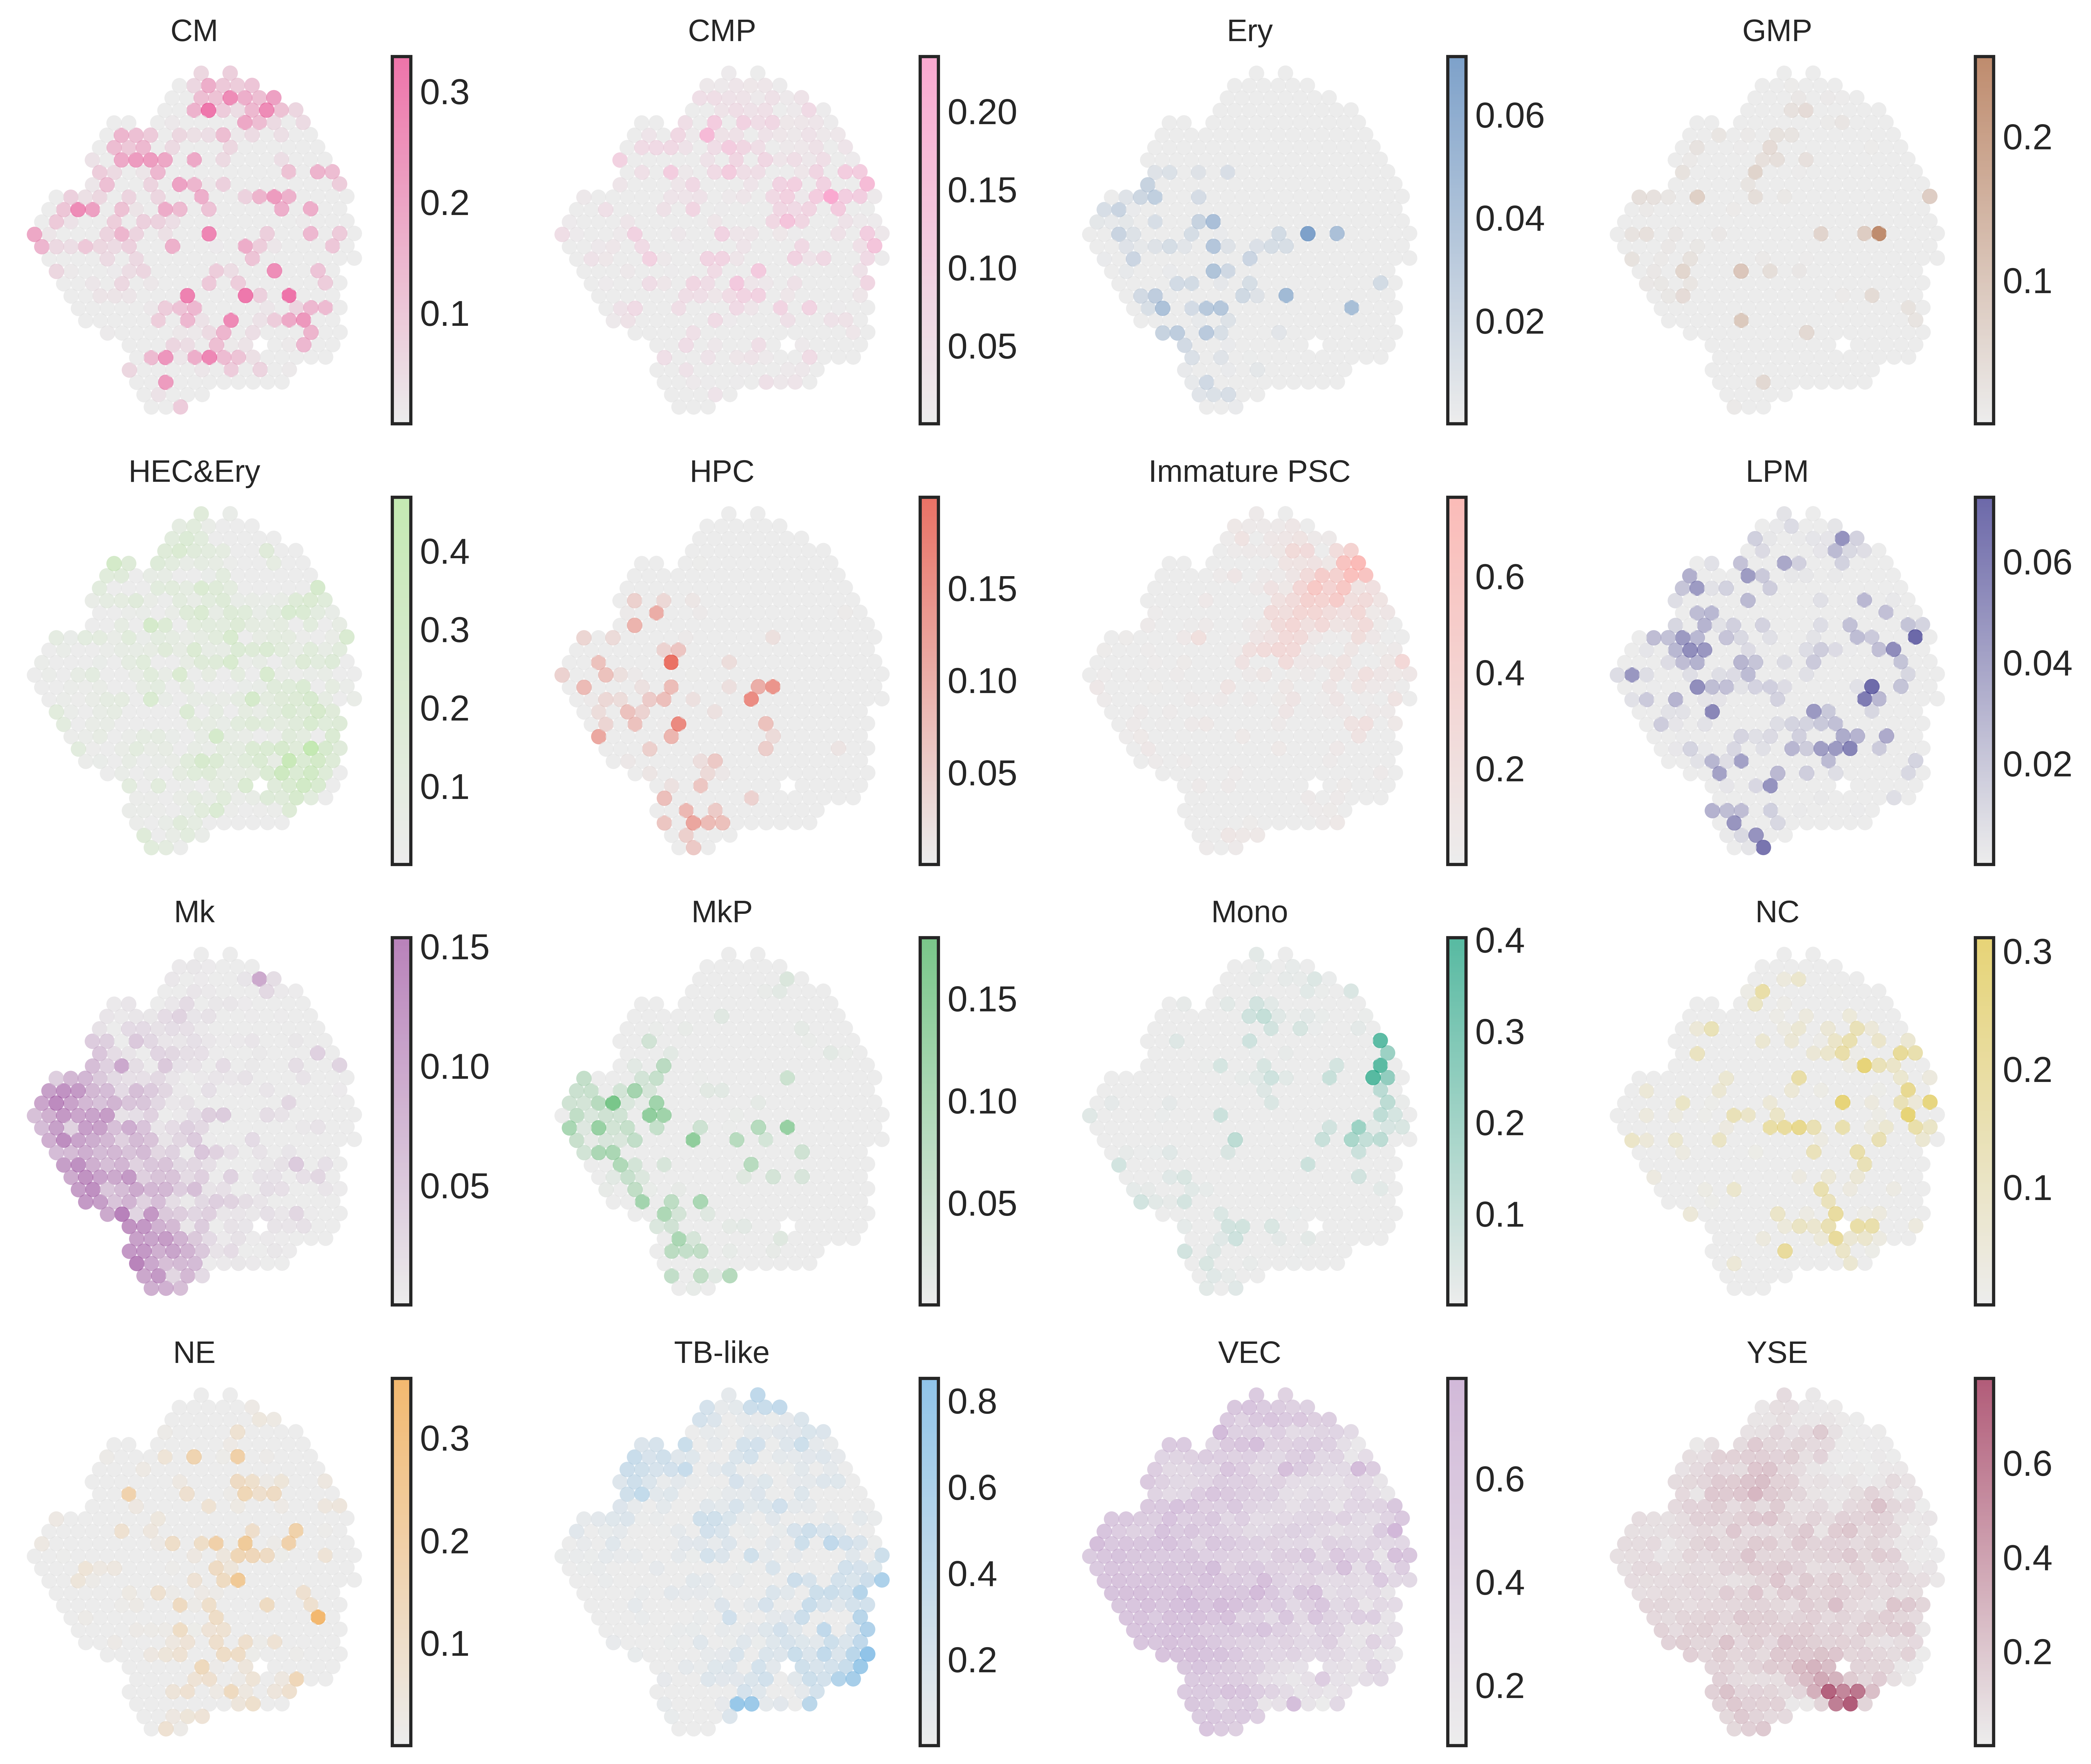

In [11]:
# frag3
plt.style.use('seaborn-white')
plt.figure(figsize=(14, 12))
for i,c in enumerate(cellprop_frag3.columns):
    plt.subplot(4, 4, i+1)
    plt.scatter(frag3.x, frag3.y*(-1), 
                marker = 'o', c=cellprop_frag3[c], cmap=cmap_dict[c], alpha=0.7, linewidth=0)
    plt.axis('off')
    plt.title(c, fontsize=12)
    plt.colorbar()